In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/schizohealth-dataset/schizophrenia_dataset.csv


In [2]:
df = pd.read_csv("/kaggle/input/schizohealth-dataset/schizophrenia_dataset.csv")
df.head()

,Hasta_ID,Yaş,Cinsiyet,Eğitim_Seviyesi,Medeni_Durum,Meslek,Gelir_Düzeyi,Yaşadığı_Yer,Tanı,Hastalık_Süresi,Hastaneye_Yatış_Sayısı,Ailede_Şizofreni_Öyküsü,Madde_Kullanımı,İntihar_Girişimi,Pozitif_Semptom_Skoru,Negatif_Semptom_Skoru,GAF_Skoru,Sosyal_Destek,Stres_Faktörleri,İlaç_Uyumu
0,1,72,1,4,2,0,2,1,0,0,0,0,0,0,32,48,72,0,2,2
1,2,49,1,5,2,2,1,0,1,35,1,1,1,1,51,63,40,2,2,0
2,3,53,1,5,3,2,1,0,1,32,0,1,0,0,72,85,51,0,1,1
3,4,67,1,3,2,0,2,0,0,0,0,0,1,0,10,21,74,1,1,2
4,5,54,0,1,2,0,2,1,0,0,0,0,0,0,4,27,98,0,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Hasta_ID                 10000 non-null  int64
 1   Yaş                      10000 non-null  int64
 2   Cinsiyet                 10000 non-null  int64
 3   Eğitim_Seviyesi          10000 non-null  int64
 4   Medeni_Durum             10000 non-null  int64
 5   Meslek                   10000 non-null  int64
 6   Gelir_Düzeyi             10000 non-null  int64
 7   Yaşadığı_Yer             10000 non-null  int64
 8   Tanı                     10000 non-null  int64
 9   Hastalık_Süresi          10000 non-null  int64
 10  Hastaneye_Yatış_Sayısı   10000 non-null  int64
 11  Ailede_Şizofreni_Öyküsü  10000 non-null  int64
 12  Madde_Kullanımı          10000 non-null  int64
 13  İntihar_Girişimi         10000 non-null  int64
 14  Pozitif_Semptom_Skoru    10000 non-null  int64
 15  Neg

In [4]:
df.describe()

,Hasta_ID,Yaş,Cinsiyet,Eğitim_Seviyesi,Medeni_Durum,Meslek,Gelir_Düzeyi,Yaşadığı_Yer,Tanı,Hastalık_Süresi,Hastaneye_Yatış_Sayısı,Ailede_Şizofreni_Öyküsü,Madde_Kullanımı,İntihar_Girişimi,Pozitif_Semptom_Skoru,Negatif_Semptom_Skoru,GAF_Skoru,Sosyal_Destek,Stres_Faktörleri,İlaç_Uyumu
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,48.867700,0.502600,3.042600,1.518200,1.510600,0.996900,0.499400,0.288700,5.859000,1.440300,0.319600,0.217700,0.08840,39.019000,39.4614,67.031800,0.992500,0.998700,1.137500
std,2886.89568,18.215054,0.500018,1.423021,1.117315,1.114097,0.817531,0.500025,0.453181,11.066814,2.824152,0.466345,0.412703,0.28389,27.276962,27.0175,23.999833,0.813578,0.817169,0.821378
min,1.00000,18.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0000,10.000000,0.000000,0.000000,0.000000
25%,2500.75000,33.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,17.000000,18.0000,54.000000,0.000000,0.000000,0.000000
50%,5000.50000,49.000000,1.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,35.000000,35.0000,72.000000,1.000000,1.000000,1.000000
75%,7500.25000,65.000000,1.000000,4.000000,3.000000,3.000000,2.000000,1.000000,1.000000,5.250000,1.000000,1.000000,0.000000,0.00000,57.000000,57.0000,86.000000,2.000000,2.000000,2.000000
max,10000.00000,80.000000,1.000000,5.000000,3.000000,3.000000,2.000000,1.000000,1.000000,40.000000,10.000000,1.000000,1.000000,1.00000,100.000000,100.0000,100.000000,2.000000,2.000000,2.000000


In [5]:
df.isnull().sum()

Hasta_ID                   0
Yaş                        0
Cinsiyet                   0
Eğitim_Seviyesi            0
Medeni_Durum               0
Meslek                     0
Gelir_Düzeyi               0
Yaşadığı_Yer               0
Tanı                       0
Hastalık_Süresi            0
Hastaneye_Yatış_Sayısı     0
Ailede_Şizofreni_Öyküsü    0
Madde_Kullanımı            0
İntihar_Girişimi           0
Pozitif_Semptom_Skoru      0
Negatif_Semptom_Skoru      0
GAF_Skoru                  0
Sosyal_Destek              0
Stres_Faktörleri           0
İlaç_Uyumu                 0
dtype: int64

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

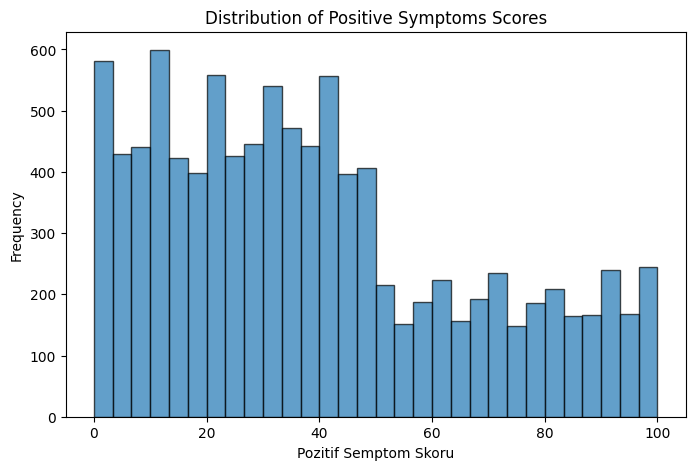

In [7]:
plt.figure(figsize=(8,5))
plt.hist(df['Pozitif_Semptom_Skoru'], bins=30, edgecolor='black', alpha=0.7)
plt.xlabel("Pozitif Semptom Skoru")
plt.ylabel("Frequency")
plt.title('Distribution of Positive Symptoms Scores')
plt.show()

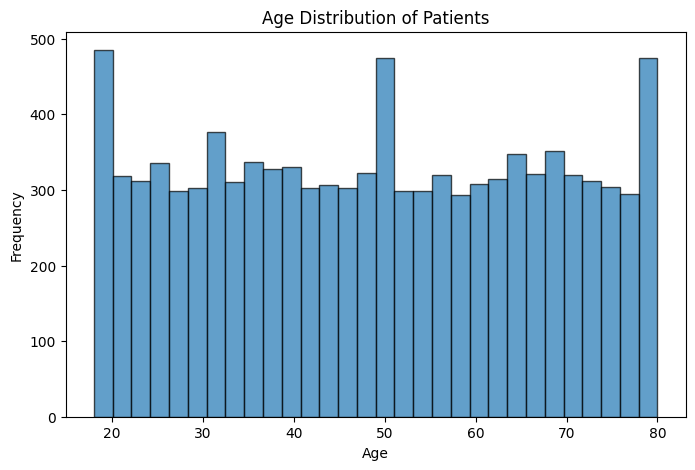

In [8]:
plt.figure(figsize=(8,5))
plt.hist(df["Yaş"], bins=30, edgecolor="black", alpha=0.7)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution of Patients")
plt.show()

In [9]:
gaf_schizophrenia= df[df['Tanı']==1]['GAF_Skoru']
gaf_no_schizophrenia = df[df['Tanı']==0]["GAF_Skoru"]
t_stat, p_value = stats.ttest_ind(gaf_schizophrenia, gaf_no_schizophrenia )

print(f'T-statistics: {t_stat}, P_Value : {p_value}')

if p_value <0.05:
    print("Significant difference: Schizophrenia patients have lower GAF score")
else:
    print("No significant difference in GAF score")


T-statistics: -159.45781906884574, P_Value : 0.0
Significant difference: Schizophrenia patients have lower GAF score


In [10]:
df['Cinsiyet'] = df["Cinsiyet"].map({ 0: "Female", 1: "Male"})
df.tail()

,Hasta_ID,Yaş,Cinsiyet,Eğitim_Seviyesi,Medeni_Durum,Meslek,Gelir_Düzeyi,Yaşadığı_Yer,Tanı,Hastalık_Süresi,Hastaneye_Yatış_Sayısı,Ailede_Şizofreni_Öyküsü,Madde_Kullanımı,İntihar_Girişimi,Pozitif_Semptom_Skoru,Negatif_Semptom_Skoru,GAF_Skoru,Sosyal_Destek,Stres_Faktörleri,İlaç_Uyumu
9995,9996,72,Female,2,3,3,0,1,1,18,1,1,0,1,84,74,54,1,1,1
9996,9997,27,Female,3,3,3,0,0,1,6,6,0,0,0,99,50,53,2,2,0
9997,9998,31,Male,3,2,0,0,0,1,29,9,1,1,0,65,65,60,1,1,1
9998,9999,56,Male,4,1,1,2,1,0,0,0,0,0,0,38,10,74,0,1,2
9999,10000,53,Female,1,3,1,0,1,0,0,0,0,0,0,24,21,87,1,2,0


In [11]:
df['Cinsiyet'] = df["Cinsiyet"].map({ "Female": 0,"Male": 1})
df.tail()

,Hasta_ID,Yaş,Cinsiyet,Eğitim_Seviyesi,Medeni_Durum,Meslek,Gelir_Düzeyi,Yaşadığı_Yer,Tanı,Hastalık_Süresi,Hastaneye_Yatış_Sayısı,Ailede_Şizofreni_Öyküsü,Madde_Kullanımı,İntihar_Girişimi,Pozitif_Semptom_Skoru,Negatif_Semptom_Skoru,GAF_Skoru,Sosyal_Destek,Stres_Faktörleri,İlaç_Uyumu
9995,9996,72,0,2,3,3,0,1,1,18,1,1,0,1,84,74,54,1,1,1
9996,9997,27,0,3,3,3,0,0,1,6,6,0,0,0,99,50,53,2,2,0
9997,9998,31,1,3,2,0,0,0,1,29,9,1,1,0,65,65,60,1,1,1
9998,9999,56,1,4,1,1,2,1,0,0,0,0,0,0,38,10,74,0,1,2
9999,10000,53,0,1,3,1,0,1,0,0,0,0,0,0,24,21,87,1,2,0


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [13]:
df.drop(columns=["Hasta_ID"])

,Yaş,Cinsiyet,Eğitim_Seviyesi,Medeni_Durum,Meslek,Gelir_Düzeyi,Yaşadığı_Yer,Tanı,Hastalık_Süresi,Hastaneye_Yatış_Sayısı,Ailede_Şizofreni_Öyküsü,Madde_Kullanımı,İntihar_Girişimi,Pozitif_Semptom_Skoru,Negatif_Semptom_Skoru,GAF_Skoru,Sosyal_Destek,Stres_Faktörleri,İlaç_Uyumu
0,72,1,4,2,0,2,1,0,0,0,0,0,0,32,48,72,0,2,2
1,49,1,5,2,2,1,0,1,35,1,1,1,1,51,63,40,2,2,0
2,53,1,5,3,2,1,0,1,32,0,1,0,0,72,85,51,0,1,1
3,67,1,3,2,0,2,0,0,0,0,0,1,0,10,21,74,1,1,2
4,54,0,1,2,0,2,1,0,0,0,0,0,0,4,27,98,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,72,0,2,3,3,0,1,1,18,1,1,0,1,84,74,54,1,1,1
9996,27,0,3,3,3,0,0,1,6,6,0,0,0,99,50,53,2,2,0
9997,31,1,3,2,0,0,0,1,29,9,1,1,0,65,65,60,1,1,1
9998,56,1,4,1,1,2,1,0,0,0,0,0,0,38,10,74,0,1,2


In [14]:
X= df.drop(columns=['Tanı'])

y=df['Tanı']

In [15]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=42)

In [16]:
scaler= StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [17]:
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [18]:
y_pred= model.predict(X_test_scaled)

In [19]:
accuracy = accuracy_score(y_test, y_pred)
precision= precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)


In [20]:
metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score", "AUC-ROC"],
    "Score": [accuracy, precision, recall, f1, roc_auc]
})

print(metrics_df)

      Metric     Score
0   Accuracy  0.999500
1  Precision  1.000000
2     Recall  0.998316
3   F1-Score  0.999158
4    AUC-ROC  0.999158


In [21]:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import shap

In [22]:
log_model = LogisticRegression(random_state=42, max_iter=1000, C=0.1)
log_model.fit(X_train_scaled, y_train)

LogisticRegression(C=0.1, max_iter=1000, random_state=42)

In [23]:
from sklearn.model_selection import train_test_split, cross_val_score
cv_scores = cross_val_score(log_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-Validation Scores: [1.       1.       1.       0.999375 1.      ]
Mean CV Accuracy: 0.9998750000000001


In [24]:
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train_scaled, y_train)
svm_model = SVC(probability =True, random_state=42)
svm_model.fit(X_train_scaled, y_train)

SVC(probability=True, random_state=42)

In [25]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "AUC-ROC": roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    }

log_results = evaluate_model(log_model, X_test_scaled, y_test)
rf_results = evaluate_model(rf_model, X_test_scaled, y_test)
svm_results = evaluate_model(svm_model, X_test_scaled, y_test)

print("Logistic Regression Results:", log_results)
print("Random Forest Results:", rf_results)
print("SVM Results:", svm_results)

Logistic Regression Results: {'Accuracy': 0.9995, 'Precision': 1.0, 'Recall': 0.9983164983164983, 'F1-Score': 0.9991575400168492, 'AUC-ROC': 1.0}
Random Forest Results: {'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1-Score': 1.0, 'AUC-ROC': 1.0}
SVM Results: {'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1-Score': 1.0, 'AUC-ROC': 1.0}


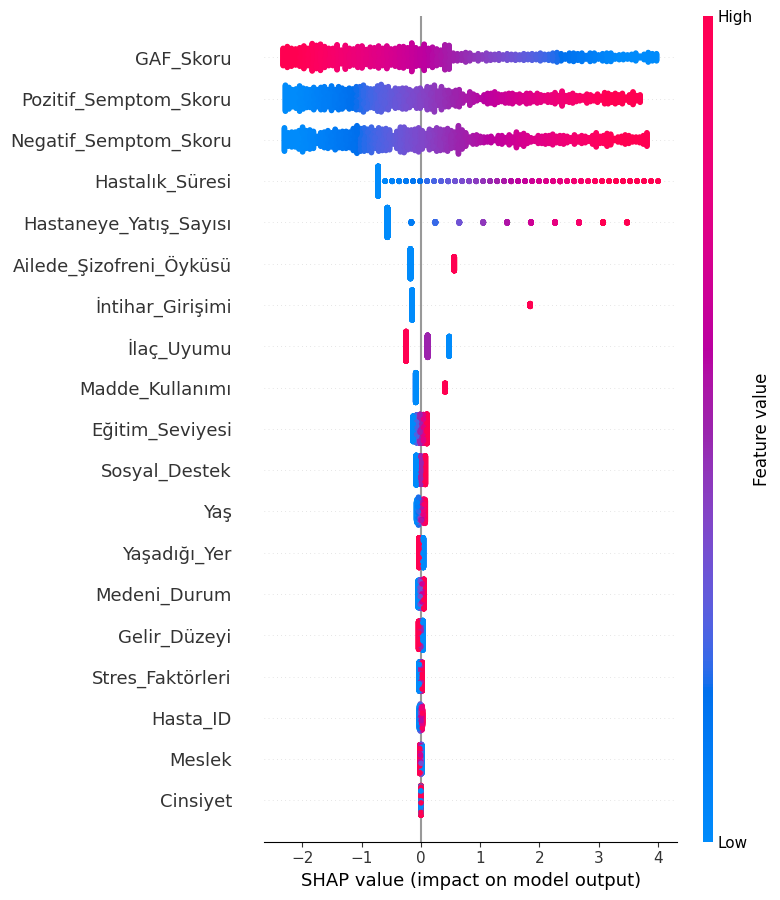

In [26]:
explainer = shap.Explainer(log_model, X_train_scaled)
shap_values = explainer(X_test_scaled)
shap.summary_plot(shap_values, X_test, feature_names=X.columns)


In [27]:
import joblib
joblib.dump(log_model, "logistic_regression_model.pkl")
print("Model saved for deployment.")

Model saved for deployment.
